In [108]:
!pip install pyspark==3.0.0

In [109]:
!pip install pyspark_dist_explore

In [110]:
cd

/root


In [111]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
import pandas as pd


In [113]:
spark = SparkSession.builder.appName('Spotify').getOrCreate()

In [114]:
df = (spark.read.format("csv").options(header="true")
    .load("/content/drive/MyDrive/tracks.csv"))

In [115]:
df.show(3)

+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|                  id|                name|popularity|duration_ms|explicit|            artists|          id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|35iwgR4jXetI318WE...|               Carve|         6|     126903|       0|            ['Uli']|['45tIt06XoI0Iio4...|  1922-02-22|       0.645| 0.445|  0| -13.338|   1|      0.451|       0.674|           0.744|   0.151|  0.127|104.851|             3|


In [116]:
type(df)

pyspark.sql.dataframe.DataFrame

In [117]:
df.columns

['id',
 'name',
 'popularity',
 'duration_ms',
 'explicit',
 'artists',
 'id_artists',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [118]:
col_name = [
 'duration_ms',          
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [119]:
for cols in col_name:
    df = df.withColumn(cols, df[cols].cast('Float'))

In [120]:
df.show(10)

+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|                  id|                name|popularity|duration_ms|explicit|            artists|          id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|35iwgR4jXetI318WE...|               Carve|       6.0|   126903.0|       0|            ['Uli']|['45tIt06XoI0Iio4...|  1922-02-22|       0.645| 0.445|0.0| -13.338| 1.0|      0.451|       0.674|           0.744|   0.151|  0.127|104.851|           3.0|


In [121]:
pca_col = [
 'popularity',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [122]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
import seaborn as sns
x = df.na.drop("any")
x1 = x.toPandas()

In [123]:
x1.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903.0,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.850998,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200.0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009003,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640.0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.417999,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0.0,176907.0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.979996,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080.0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220001,4.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

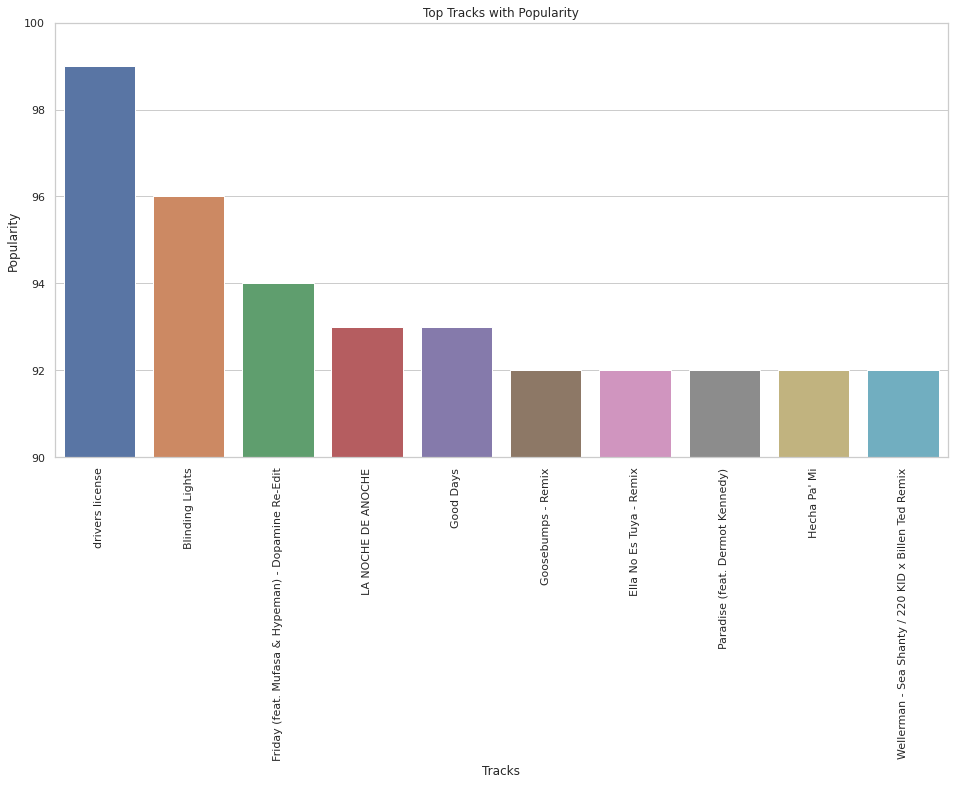

In [124]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
y = x1.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(y.index, y)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
ax.set_ylim(90,100)
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

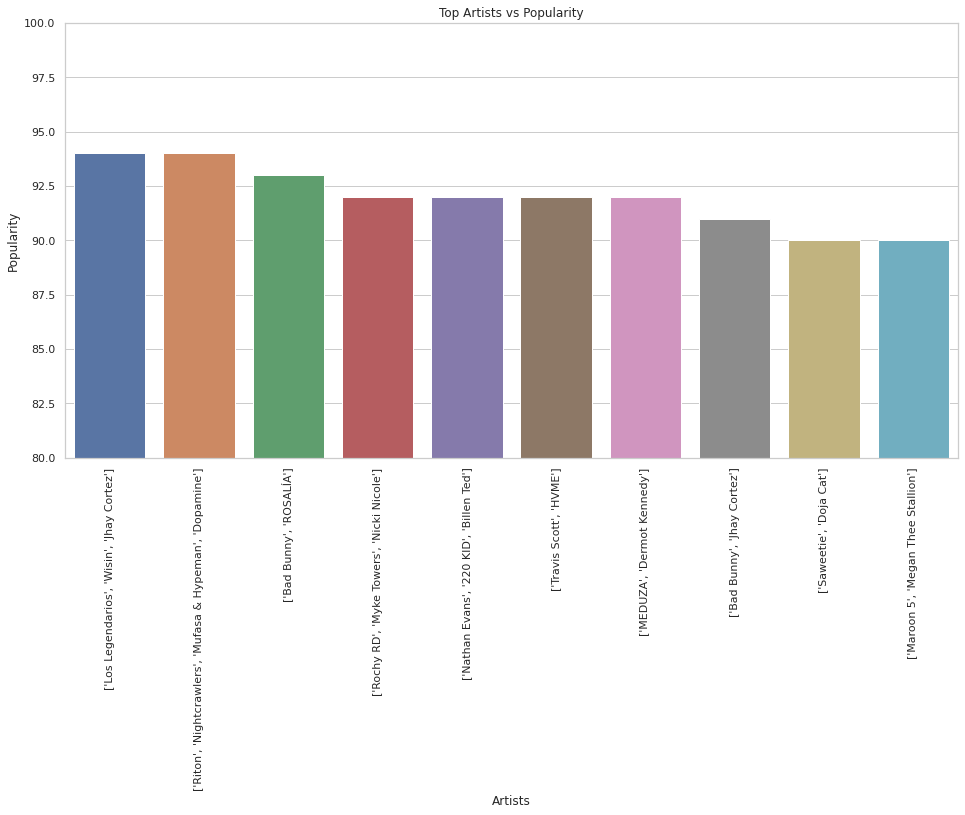

In [125]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
y2 = x1.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(y2.index,y2)
ax.set_title('Top Artists vs Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
ax.set_ylim(80,100)
plt.xticks(rotation = 90)

In [126]:
duration = x1['duration_ms']
duration = duration /60000
duration
l = list(set(duration))
def find(x):
  if x < 3:
    return "Short"
  if x > 3 and x < 5:
    return "Medium"
  if x > 5 :
    return 'Long'
res = list(map(find,duration))
x1['song_length'] = res

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

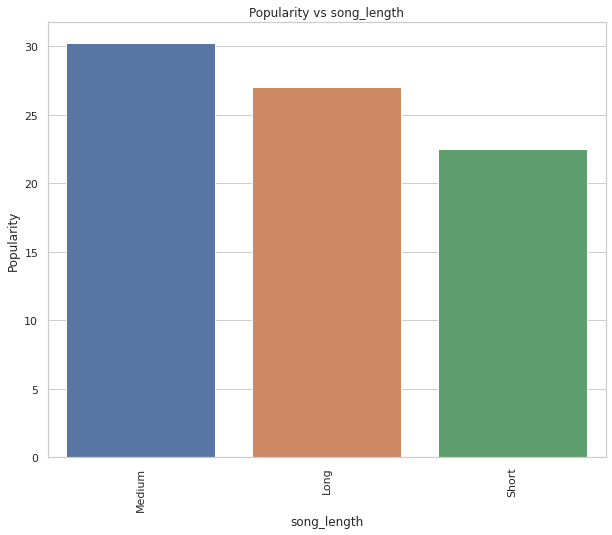

In [127]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
y3 = x1.groupby("song_length")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(y3.index,y3)
ax.set_title('Popularity vs song_length')
ax.set_ylabel('Popularity')
ax.set_xlabel('song_length')
plt.xticks(rotation = 90)

In [128]:
y2

artists
['Los Legendarios', 'Wisin', 'Jhay Cortez']                   94.0
['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']    94.0
['Bad Bunny', 'ROSALÍA']                                      93.0
['Rochy RD', 'Myke Towers', 'Nicki Nicole']                   92.0
['Nathan Evans', '220 KID', 'Billen Ted']                     92.0
['Travis Scott', 'HVME']                                      92.0
['MEDUZA', 'Dermot Kennedy']                                  92.0
['Bad Bunny', 'Jhay Cortez']                                  91.0
['Saweetie', 'Doja Cat']                                      90.0
['Maroon 5', 'Megan Thee Stallion']                           90.0
Name: popularity, dtype: float32

### Density Plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

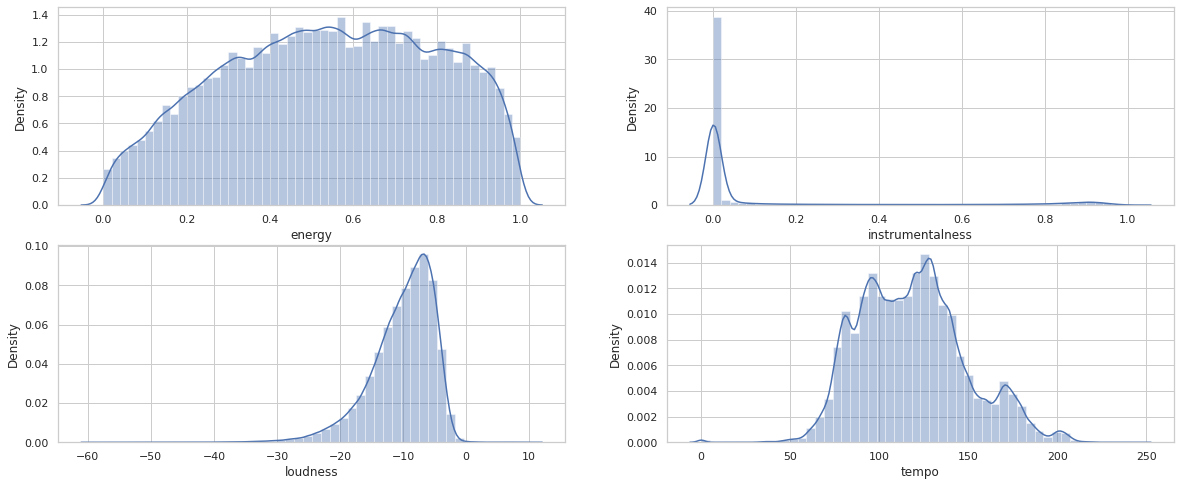

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
sns.distplot(x1['energy'])
plt.subplot(2, 2,2)
sns.distplot(x1['instrumentalness'])
plt.subplot(2, 2,3)
sns.distplot(x1['loudness'])
plt.subplot(2, 2,4)
sns.distplot(x1['tempo'])
plt.show()

### PCA

In [130]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import MaxAbsScaler
assembler = VectorAssembler(inputCols = pca_col, outputCol = 'features')
df1 = assembler.transform(df.na.drop("any"))

In [131]:
df1.show(3)

+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+--------------------+
|                  id|                name|popularity|duration_ms|explicit|            artists|          id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|            features|
+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+--------------------+
|35iwgR4jXetI318WE...|               Carve|       6.0|   126903.0|       0|            ['Uli']|['45tIt06XoI0Iio4...|  1922-02-22|       0.645| 0.445|0.0| -13.338| 1.0|      0.451|       0

In [132]:
scaler = StandardScaler(
    inputCol = 'features', 
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True
).fit(df1)


In [133]:
scaledData = scaler.transform(df1)

In [134]:
a = scaledData.select('scaledFeatures')

In [135]:
pca = PCA(k=7,inputCol="scaledFeatures", outputCol="pcaFeatures").fit(scaledData)

df_pca = pca.transform(scaledData)

In [136]:
df_pca.select('pcaFeatures')

DataFrame[pcaFeatures: vector]

In [137]:
df3 = df_pca.select('pcaFeatures')

In [138]:
df3.pcaFeatures

Column<b'pcaFeatures'>

In [139]:
type(df3.pcaFeatures)

pyspark.sql.column.Column

In [140]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


# Trains a k-means model.
kmeans = KMeans(k=4)
model = kmeans.fit(df_pca)

# Make predictions
predictions = model.transform(df_pca)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.25895263489045
Cluster Centers: 
[ 4.78878112e+01  3.38696876e+00  6.25699235e-01 -8.20655044e+00
  6.13015080e-01  8.71906934e-02  3.12504251e-01  5.92095174e-02
  1.99793092e-01  5.59685101e-01  1.10852886e+02]
[ 1.65686364e+01  5.82719140e-01  5.39475529e-01 -1.05972439e+01
  6.64157531e-01  8.98939282e-02  4.66326512e-01  1.45101295e-01
  2.19230311e-01  5.79082825e-01  1.27575309e+02]
[ 18.76305329   0.52248497   0.43188951 -12.20400763   0.66786303
   0.13972383   0.59675061   0.14630683   0.22207492   0.50189656
  86.88946824]
[ 3.26881951e+01  4.97591120e-01  6.15005343e-01 -8.90312936e+00
  6.71297059e-01  1.01996074e-01  3.65219489e-01  8.06897861e-02
  2.10739784e-01  5.83924344e-01  1.66412349e+02]


In [141]:
from  pyspark.ml.linalg import Vectors
temp = predictions.select("pcaFeatures")
temp = temp.rdd.map(lambda x: [float(y) for y in x['pcaFeatures']]).toDF(['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [142]:
pandas_df = temp.toPandas()
predictions_df = predictions.toPandas()

In [143]:
pred = predictions_df['prediction']

In [144]:
final_df = pd.concat([pandas_df,pred],axis =1)

In [145]:
final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,prediction
0,2.439504,0.127685,0.381451,-0.292444,-1.284149,-0.120593,2.029449,2
1,2.933293,0.313643,3.605105,-0.020447,1.848634,0.989868,2.385221,2
2,2.952275,-0.719813,0.186809,-0.602359,0.594743,0.775773,-0.942709,1
3,4.456108,-0.880575,-1.272521,-2.232867,-0.909535,1.542237,1.244552,3
4,3.015523,0.801735,-0.036649,-0.042213,-0.362844,0.189906,-1.315270,2


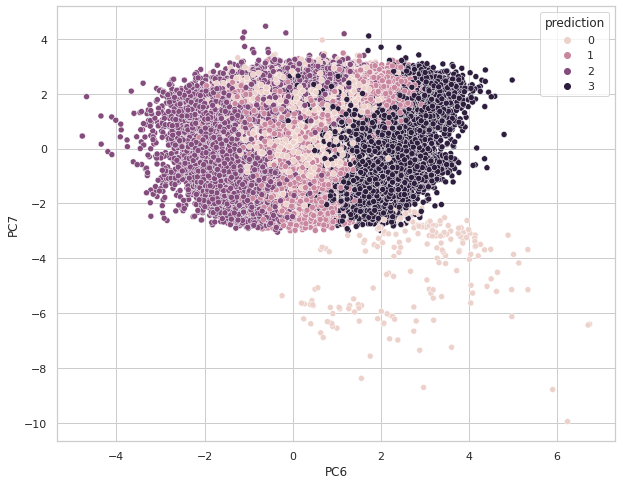

In [146]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
sns.scatterplot(data=final_df, x="PC6", y="PC7", hue="prediction")
plt.show()

In [148]:
#import plotly.express as px
#fig = px.scatter(final_df, x="PC6", y="PC7", color="prediction")
#fig.show()